In [1]:
import anvil.server

anvil.server.connect("3U7PFJZXR75IRYHRLZF77QYN-G6EWQ7BESHFD5X2R")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [2]:
# Importing all the utilities
from utilities_stats import *

#Setting the total number of matchdays in the season
tot_giornate = 35

# setting useful parameters
Teams, Logos, parameters, Results_0, goal_marks = set_par()
giornate = current_matchday()

# filling individual dataframes and conditional display
Results = fill_dataframe_partita(Results_0, giornate, parameters, goal_marks, Teams, Print = False)

# saving cumulative statistical data
pf_med, pf_std, ps_med, ps_std, gf_med, gf_std = cumulative_data(Results, giornate, Print = False)

# Building cumulative dataframe
Total = make_Total_df(Results, giornate, goal_marks)
Tot_per_round = partial_totals(Results, giornate, tot_giornate, goal_marks)
#Total.head(10)

In [3]:
import json
from pymongo import MongoClient
from pprint import pprint
import pymongo



with open('credential.json','r') as f:
    cred = json.load(f)
    
    
cluster = MongoClient(cred['cred'])
# choosing database
db = cluster["Game"]
# choosing collection
collection = db["Players"]

In [4]:
@anvil.server.callable

def test_funct(owner, squad):
    players = []
    roles = []
    loan = []
    posts = collection.find({'info.current_team.owner': owner,'info.current_team.squad': squad})
    for player in posts:
        players.append(player['name'])
        roles.append(player['info']['personal_info']['FC_role'])
        temp = ''
        if player['info']['current_team']['on_loan']:
            temp = 'on loan'
        loan.append(temp)
    return players, roles, loan

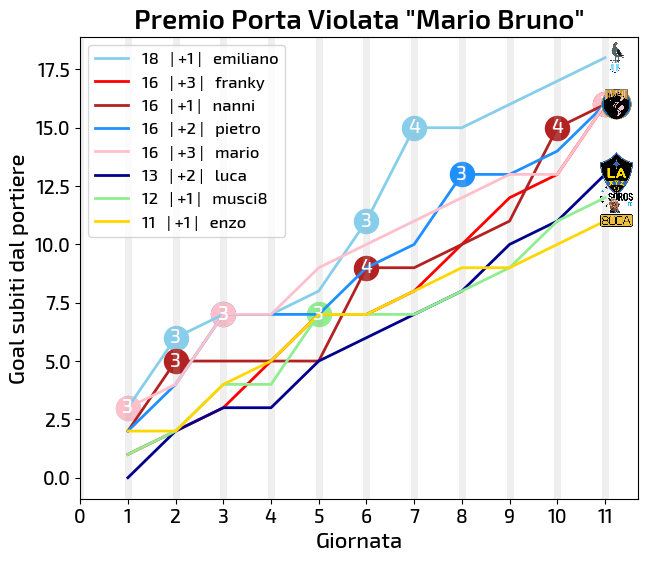

In [10]:
premio_plot(Results, giornate, Teams, Logos, premio = 'Porta Violata')